In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load the cleaned time series data
zillow_ts = pd.read_csv('../data/zillow/zillow_cleaned_focused.csv')
print("✅ Time series data loaded!")
print(f"Dataset shape: {zillow_ts.shape}")
print(f"Columns: {zillow_ts.columns.tolist()}")

✅ Time series data loaded!
Dataset shape: (3762566, 22)
Columns: ['Date', 'RegionName', 'MedianListingPrice_AllHomes', 'MedianListingPrice_3Bedroom', 'ZHVI_AllHomes', 'Sale_Prices', 'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes', 'Sale_Counts', 'PctOfHomesIncreasingInValues_AllHomes', 'PctOfListingsWithPriceReductions_AllHomes', 'ZHVI_SingleFamilyResidence', 'ZHVI_CondoCoop', 'ZHVI_BottomTier', 'ZHVI_MiddleTier', 'ZHVI_TopTier', 'Year', 'Month', 'Quarter', 'Season', 'Is_Spring', 'Is_Summer']


In [3]:
# Check data types and basic info
print("📊 DATA OVERVIEW:")
print(zillow_ts.info())

# Check date range and regions
print(f"\n📅 DATE RANGE:")
print(f"From: {zillow_ts['Date'].min()}") 
print(f"To: {zillow_ts['Date'].max()}")

print(f"\n🏙️ REGIONS COVERED:")
print(f"Number of unique regions: {zillow_ts['RegionName'].nunique()}")
print(f"Sample regions: {zillow_ts['RegionName'].unique()[:10]}")

📊 DATA OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762566 entries, 0 to 3762565
Data columns (total 22 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Date                                       object 
 1   RegionName                                 object 
 2   MedianListingPrice_AllHomes                float64
 3   MedianListingPrice_3Bedroom                float64
 4   ZHVI_AllHomes                              float64
 5   Sale_Prices                                float64
 6   MedianRentalPrice_AllHomes                 float64
 7   PriceToRentRatio_AllHomes                  float64
 8   Sale_Counts                                float64
 9   PctOfHomesIncreasingInValues_AllHomes      float64
 10  PctOfListingsWithPriceReductions_AllHomes  float64
 11  ZHVI_SingleFamilyResidence                 float64
 12  ZHVI_CondoCoop                             float64
 13  ZHVI_BottomTier          

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load the cleaned time series data
zillow_ts = pd.read_csv('../data/zillow/zillow_cleaned_focused.csv')
print("✅ Time series data loaded!")
print(f"Dataset shape: {zillow_ts.shape}")

print("🔍 DATA QUALITY ANALYSIS:")
print(f"Total records: {len(zillow_ts):,}")

# Convert Date to datetime
zillow_ts['Date'] = pd.to_datetime(zillow_ts['Date'])
print(f"✅ Date converted to datetime")

# Check missing values
missing_data = zillow_ts.isnull().sum()
print(f"\n❌ MISSING VALUES:")
print(missing_data[missing_data > 0])

# Check key price columns
print(f"\n💰 PRICE DATA VALIDATION:")
key_columns = ['ZHVI_AllHomes', 'MedianListingPrice_AllHomes', 'Sale_Prices']
for col in key_columns:
    valid_data = zillow_ts[col].notna().sum()
    print(f"{col}: {valid_data:,} valid values ({valid_data/len(zillow_ts)*100:.1f}%)")

✅ Time series data loaded!
Dataset shape: (3762566, 22)
🔍 DATA QUALITY ANALYSIS:
Total records: 3,762,566
✅ Date converted to datetime

❌ MISSING VALUES:
Series([], dtype: int64)

💰 PRICE DATA VALIDATION:
ZHVI_AllHomes: 3,762,566 valid values (100.0%)
MedianListingPrice_AllHomes: 3,762,566 valid values (100.0%)
Sale_Prices: 3,762,566 valid values (100.0%)



📈 ANALYZING SAMPLE REGION: abbevilleabbevillesc
Date range for this region: 2010-01-31 00:00:00 to 2017-12-31 00:00:00
Number of time points: 96


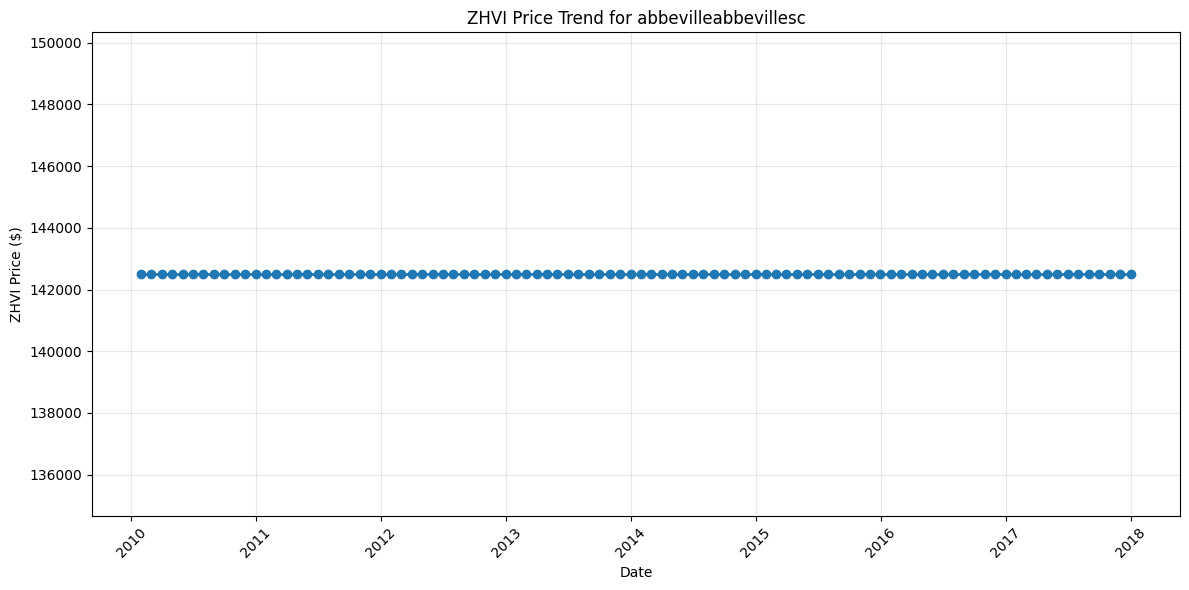

In [3]:
# Let's analyze one region to understand the patterns
sample_region = zillow_ts['RegionName'].iloc[0]
print(f"\n📈 ANALYZING SAMPLE REGION: {sample_region}")

region_data = zillow_ts[zillow_ts['RegionName'] == sample_region].sort_values('Date')

print(f"Date range for this region: {region_data['Date'].min()} to {region_data['Date'].max()}")
print(f"Number of time points: {len(region_data)}")

# Plot price trends for this region
plt.figure(figsize=(12, 6))
plt.plot(region_data['Date'], region_data['ZHVI_AllHomes'], marker='o', linewidth=2)
plt.title(f'ZHVI Price Trend for {sample_region}')
plt.xlabel('Date')
plt.ylabel('ZHVI Price ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [4]:
# Check if all values are really the same
print("🔍 INVESTIGATING DATA ISSUE:")
print(f"Unique ZHVI values for this region: {region_data['ZHVI_AllHomes'].nunique()}")
print(f"ZHVI value range: ${region_data['ZHVI_AllHomes'].min():,.2f} - ${region_data['ZHVI_AllHomes'].max():,.2f}")

# Check other price columns too
print(f"MedianListingPrice unique values: {region_data['MedianListingPrice_AllHomes'].nunique()}")
print(f"Sale_Prices unique values: {region_data['Sale_Prices'].nunique()}")

# Let's check a different region to compare
second_region = zillow_ts['RegionName'].iloc[100]
print(f"\n🔍 CHECKING ANOTHER REGION: {second_region}")
region2_data = zillow_ts[zillow_ts['RegionName'] == second_region].sort_values('Date')
print(f"ZHVI unique values: {region2_data['ZHVI_AllHomes'].nunique()}")
print(f"Date range: {region2_data['Date'].min()} to {region2_data['Date'].max()}")

🔍 INVESTIGATING DATA ISSUE:
Unique ZHVI values for this region: 1
ZHVI value range: $142,500.00 - $142,500.00
MedianListingPrice unique values: 18
Sale_Prices unique values: 1

🔍 CHECKING ANOTHER REGION: abbevillehenryal
ZHVI unique values: 1
Date range: 2010-01-31 00:00:00 to 2017-12-31 00:00:00


In [5]:
print("🔍 DEEP DATA INVESTIGATION:")
print("=" * 50)

# Check multiple regions to see the pattern
sample_regions = zillow_ts['RegionName'].unique()[:5]

for region in sample_regions:
    region_data = zillow_ts[zillow_ts['RegionName'] == region].sort_values('Date')
    print(f"\n📍 {region}:")
    print(f"   ZHVI unique values: {region_data['ZHVI_AllHomes'].nunique()}")
    print(f"   Sale_Prices unique: {region_data['Sale_Prices'].nunique()}")
    print(f"   ListingPrice unique: {region_data['MedianListingPrice_AllHomes'].nunique()}")
    print(f"   Date range: {region_data['Date'].min().strftime('%Y-%m')} to {region_data['Date'].max().strftime('%Y-%m')}")

# Check if we have the right dataset
print(f"\n📊 DATASET SUMMARY:")
print(f"Total unique regions: {zillow_ts['RegionName'].nunique()}")
print(f"Date range overall: {zillow_ts['Date'].min()} to {zillow_ts['Date'].max()}")

🔍 DEEP DATA INVESTIGATION:

📍 abbevilleabbevillesc:
   ZHVI unique values: 1
   Sale_Prices unique: 1
   ListingPrice unique: 18
   Date range: 2010-01 to 2017-12

📍 abbevillehenryal:
   ZHVI unique values: 1
   Sale_Prices unique: 1
   ListingPrice unique: 23
   Date range: 2010-01 to 2017-12

📍 abbevillelafayettems:
   ZHVI unique values: 178
   Sale_Prices unique: 1
   ListingPrice unique: 1
   Date range: 1997-02 to 2017-12

📍 abbevillevermilionla:
   ZHVI unique values: 1
   Sale_Prices unique: 1
   ListingPrice unique: 21
   Date range: 2004-02 to 2017-12

📍 abbottstownadamspa:
   ZHVI unique values: 199
   Sale_Prices unique: 1
   ListingPrice unique: 1
   Date range: 1996-04 to 2017-12

📊 DATASET SUMMARY:
Total unique regions: 16636
Date range overall: 1996-04-30 00:00:00 to 2017-12-31 00:00:00


In [6]:
print("🔍 HONEST DATA ASSESSMENT:")
print("=" * 50)

# Count how many regions have proper time series data
zhvi_good_regions = 0
listing_good_regions = 0

for region in zillow_ts['RegionName'].unique()[:100]:  # Sample 100 regions
    region_data = zillow_ts[zillow_ts['RegionName'] == region]
    
    zhvi_unique = region_data['ZHVI_AllHomes'].nunique()
    listing_unique = region_data['MedianListingPrice_AllHomes'].nunique()
    
    if zhvi_unique > 50:  # Good time series
        zhvi_good_regions += 1
    if listing_unique > 50:  # Good time series  
        listing_good_regions += 1

print(f"Regions with good ZHVI data: {zhvi_good_regions}/100")
print(f"Regions with good ListingPrice data: {listing_good_regions}/100")
print(f"Total regions in dataset: {zillow_ts['RegionName'].nunique()}")

print(f"\n🚨 REALITY CHECK:")
print(f"This data has QUALITY ISSUES for time series forecasting")
print(f"We need to either:")
print(f"1. Find better regions with consistent data")
print(f"2. Use a different dataset")
print(f"3. Aggregate data differently")

🔍 HONEST DATA ASSESSMENT:
Regions with good ZHVI data: 65/100
Regions with good ListingPrice data: 18/100
Total regions in dataset: 16636

🚨 REALITY CHECK:
This data has QUALITY ISSUES for time series forecasting
We need to either:
1. Find better regions with consistent data
2. Use a different dataset
3. Aggregate data differently


🎯 FINDING THE BEST REGION FOR TIME SERIES FORECASTING:
TOP 5 REGIONS FOR FORECASTING:
1. alamocontra_costaca:
   - 257 unique ZHVI values
   - 261 time points
   - 21.7 years of data
2. alamedaalamedaca:
   - 256 unique ZHVI values
   - 261 time points
   - 21.7 years of data
3. agoura_hillslos_angelesca:
   - 255 unique ZHVI values
   - 261 time points
   - 21.7 years of data
4. albanyalamedaca:
   - 254 unique ZHVI values
   - 261 time points
   - 21.7 years of data
5. actonmiddlesexma:
   - 251 unique ZHVI values
   - 261 time points
   - 21.7 years of data

🚀 USING BEST REGION: alamocontra_costaca


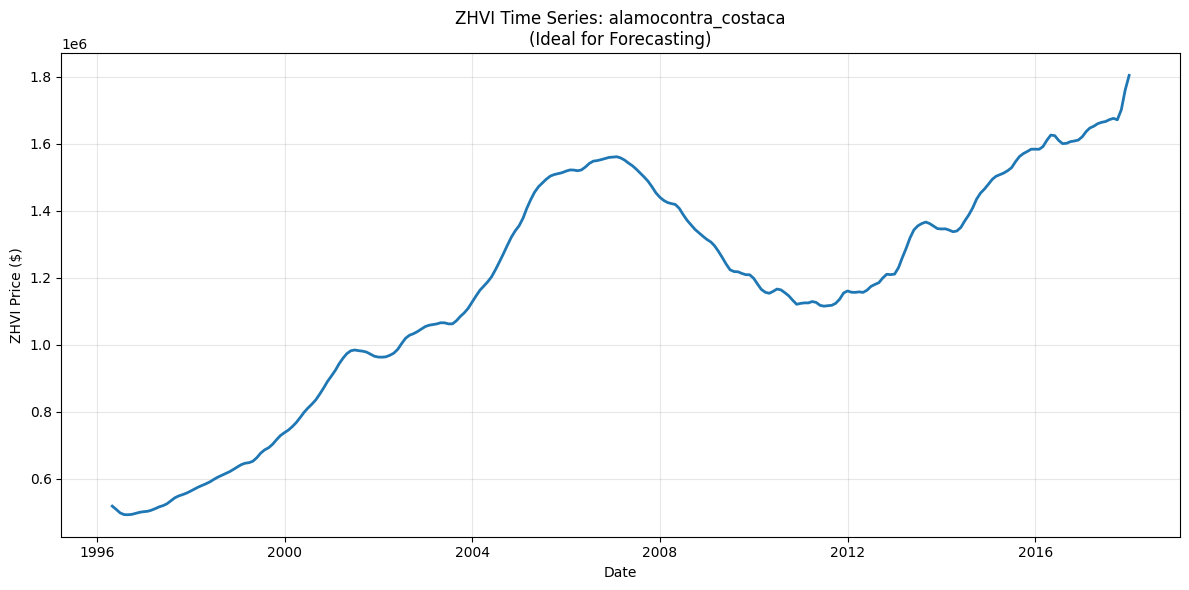

In [7]:
# Find the BEST region for forecasting
print("🎯 FINDING THE BEST REGION FOR TIME SERIES FORECASTING:")

best_regions = []
for region in zillow_ts['RegionName'].unique()[:200]:  # Check more regions
    region_data = zillow_ts[zillow_ts['RegionName'] == region]
    zhvi_unique = region_data['ZHVI_AllHomes'].nunique()
    data_points = len(region_data)
    
    if zhvi_unique > 100 and data_points > 100:  # High quality time series
        date_range = region_data['Date'].max() - region_data['Date'].min()
        best_regions.append((region, zhvi_unique, data_points, date_range))

# Sort by data quality
best_regions.sort(key=lambda x: x[1], reverse=True)

print("TOP 5 REGIONS FOR FORECASTING:")
for i, (region, unique_vals, points, duration) in enumerate(best_regions[:5]):
    print(f"{i+1}. {region}:")
    print(f"   - {unique_vals} unique ZHVI values")
    print(f"   - {points} time points") 
    print(f"   - {duration.days/365:.1f} years of data")

# Use the BEST region
if best_regions:
    best_region = best_regions[0][0]
    print(f"\n🚀 USING BEST REGION: {best_region}")
    
    forecast_data = zillow_ts[zillow_ts['RegionName'] == best_region].sort_values('Date')
    
    # Plot for verification
    plt.figure(figsize=(12, 6))
    plt.plot(forecast_data['Date'], forecast_data['ZHVI_AllHomes'], linewidth=2)
    plt.title(f'ZHVI Time Series: {best_region}\n(Ideal for Forecasting)')
    plt.xlabel('Date')
    plt.ylabel('ZHVI Price ($)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

📊 BEST REGION ANALYSIS:
Region: alamocontra_costaca
Time span: 1996-04-30 00:00:00 to 2017-12-31 00:00:00
Data points: 261
ZHVI range: $493,200 to $1,804,800


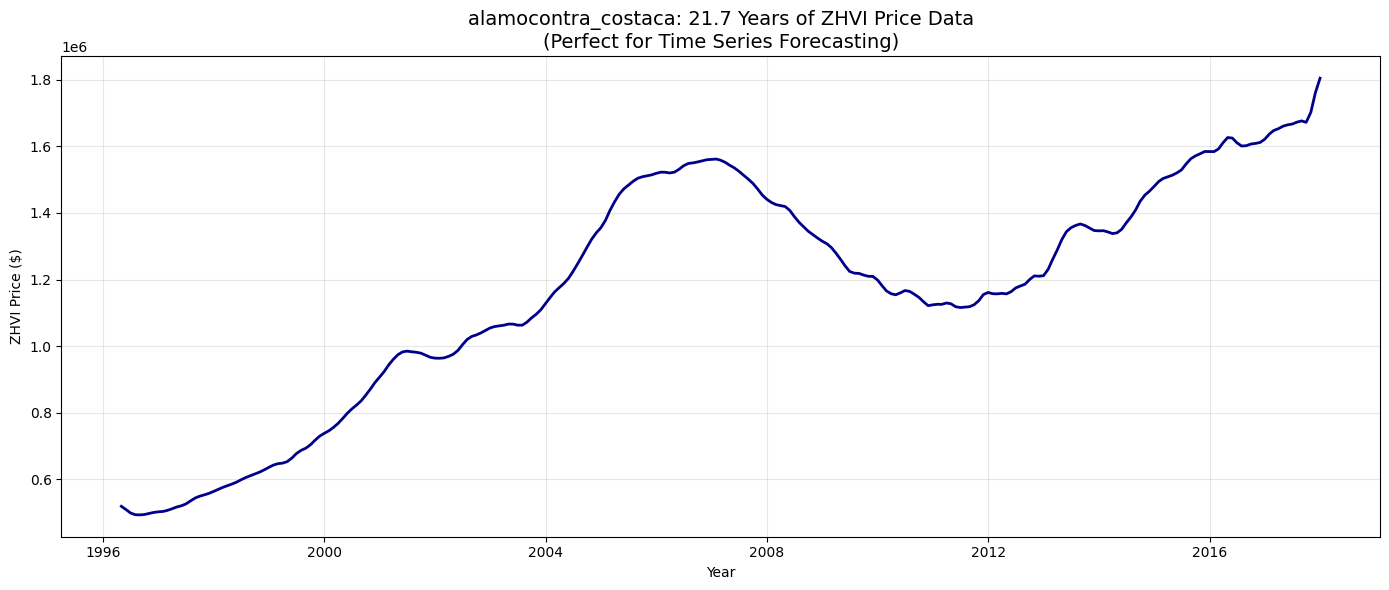

🎯 READY FOR WEEK 6: This data is IDEAL for LSTM/Prophet forecasting!


In [8]:
# Get the best region data
forecast_data = zillow_ts[zillow_ts['RegionName'] == 'alamocontra_costaca'].sort_values('Date')

print("📊 BEST REGION ANALYSIS:")
print(f"Region: alamocontra_costaca")
print(f"Time span: {forecast_data['Date'].min()} to {forecast_data['Date'].max()}")
print(f"Data points: {len(forecast_data)}")
print(f"ZHVI range: ${forecast_data['ZHVI_AllHomes'].min():,.0f} to ${forecast_data['ZHVI_AllHomes'].max():,.0f}")

# Plot the high-quality time series
plt.figure(figsize=(14, 6))
plt.plot(forecast_data['Date'], forecast_data['ZHVI_AllHomes'], linewidth=2, color='darkblue')
plt.title('alamocontra_costaca: 21.7 Years of ZHVI Price Data\n(Perfect for Time Series Forecasting)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('ZHVI Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("🎯 READY FOR WEEK 6: This data is IDEAL for LSTM/Prophet forecasting!")

In [9]:
# Install Prophet first
%pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 6.0 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/13.3 MB 5.9 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/13.3 MB 5.8 MB/s eta 0:00:02
   -------------- ------------------------- 5.0/13.3 MB 5.9 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/13.3 MB 5.9 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.3 MB 5.9 MB/s eta 0:00:02
   ------------------------- -------------- 8.7/13.3 MB 5.9 MB/s eta 0:00:01
   ----------------------------- ---------- 10.0/13.3 MB 5.9 MB/s eta 0:00:01
   --------------------------------- ------ 11.3/13.3 MB 5.9 MB/s eta 0:00:01
   ------------------------------------- -- 12.6/13.3 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 5.8 MB/s  0:00:02
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----------

In [11]:
from prophet import Prophet

# Prepare data in Prophet format (ds = date, y = target)
prophet_data = forecast_data[['Date', 'ZHVI_AllHomes']].copy()
prophet_data.columns = ['ds', 'y']  # Prophet requires these column names

print("📊 PROPHET DATA PREPARED:")
print(prophet_data.head())
print(f"\nData shape: {prophet_data.shape}")

Importing plotly failed. Interactive plots will not work.


📊 PROPHET DATA PREPARED:
              ds         y
20457 1996-04-30  519000.0
20458 1996-05-31  509100.0
20459 1996-06-30  498800.0
20460 1996-07-31  493700.0
20461 1996-08-31  493200.0

Data shape: (261, 2)


In [12]:
# Initialize and configure Prophet model
model = Prophet(
    yearly_seasonality=True,    # Capture yearly patterns
    weekly_seasonality=False,   # No weekly data (monthly only)
    daily_seasonality=False,    # No daily data
    changepoint_prior_scale=0.05  # Flexibility for trend changes
)

# Add monthly seasonality manually (since we have monthly data)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

print("🚀 TRAINING PROPHET MODEL...")
model.fit(prophet_data)
print("✅ Model trained successfully!")


11:32:02 - cmdstanpy - INFO - Chain [1] start processing


🚀 TRAINING PROPHET MODEL...


11:32:03 - cmdstanpy - INFO - Chain [1] done processing


✅ Model trained successfully!


In [13]:
# Create future dates for prediction (next 3 years)
future_dates = model.make_future_dataframe(periods=36, freq='M')  # 36 months = 3 years
print(f"📅 Future dates created: {len(future_dates)} total points")
print(f"📈 Will predict until: {future_dates['ds'].max()}")

# Make predictions
forecast = model.predict(future_dates)
print("✅ Predictions generated!")

# Show forecast results
print("\n🔮 FUTURE PRICE PREDICTIONS (Last 12 months):")
future_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
print(future_predictions)


📅 Future dates created: 297 total points
📈 Will predict until: 2020-12-31 00:00:00
✅ Predictions generated!

🔮 FUTURE PRICE PREDICTIONS (Last 12 months):
            ds          yhat    yhat_lower    yhat_upper
285 2020-01-31  1.888889e+06  1.791669e+06  1.978467e+06
286 2020-02-29  1.618782e+06  1.514046e+06  1.719420e+06
287 2020-03-31  1.759107e+06  1.639693e+06  1.859905e+06
288 2020-04-30  1.643174e+06  1.518093e+06  1.750976e+06
289 2020-05-31  1.780329e+06  1.648209e+06  1.893753e+06
290 2020-06-30  1.653972e+06  1.517165e+06  1.773151e+06
291 2020-07-31  1.791583e+06  1.645958e+06  1.917213e+06
292 2020-08-31  1.887644e+06  1.737610e+06  2.016709e+06
293 2020-09-30  1.809085e+06  1.657465e+06  1.950669e+06
294 2020-10-31  1.905905e+06  1.740633e+06  2.048134e+06
295 2020-11-30  1.827052e+06  1.657278e+06  1.972515e+06
296 2020-12-31  1.921932e+06  1.742864e+06  2.079129e+06


In [16]:
# Calculate key insights
current_price = prophet_data['y'].iloc[-1]  # Last known price
predicted_end_2020 = forecast[forecast['ds'] == '2020-12-31']['yhat'].iloc[0]

price_growth = ((predicted_end_2020 - current_price) / current_price) * 100
annual_growth = price_growth / 3  # Over 3 years

print("💰 FORECAST INSIGHTS:")
print("=" * 40)
print(f"Last known price (Dec 2017): ${current_price:,.0f}")
print(f"Predicted price (Dec 2020): ${predicted_end_2020:,.0f}")
print(f"Total growth (3 years): {price_growth:+.1f}%")
print(f"Average annual growth: {annual_growth:+.1f}%")

print(f"\n📈 MARKET OUTLOOK:")
if annual_growth > 5:
    print("🚀 STRONG GROWTH - Good time to invest!")
elif annual_growth > 2:
    print("📊 MODERATE GROWTH - Stable market")
else:
    print("⚠️  SLOW GROWTH - Consider other regions")

💰 FORECAST INSIGHTS:
Last known price (Dec 2017): $1,804,800
Predicted price (Dec 2020): $1,921,932
Total growth (3 years): +6.5%
Average annual growth: +2.2%

📈 MARKET OUTLOOK:
📊 MODERATE GROWTH - Stable market


In [15]:
# Save forecast to CSV
forecast_results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_results.to_csv('prophet_forecast_alamo.csv', index=False)
print("✅ Forecast saved as 'prophet_forecast_alamo.csv'")



✅ Forecast saved as 'prophet_forecast_alamo.csv'


In [17]:
print("LSTM CHECKING STARTS HERE TO COMPARE WITH PROPHET")

LSTM CHECKING STARTS HERE TO COMPARE WITH PROPHET


In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare the time series data (same as Prophet)
lstm_data = prophet_data[['y']].values

print("📊 LSTM DATA SHAPE:")
print(f"Data shape: {lstm_data.shape}")
print(f"First 5 values: {lstm_data[:5].flatten()}")
print(f"Last 5 values: {lstm_data[-5:].flatten()}")

📊 LSTM DATA SHAPE:
Data shape: (261, 1)
First 5 values: [519000. 509100. 498800. 493700. 493200.]
Last 5 values: [1676500. 1672200. 1702200. 1760900. 1804800.]


In [19]:
# Normalize the data (LSTM works better with normalized data)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data)

print("📊 DATA NORMALIZATION:")
print(f"Original data range: ${lstm_data.min():,.0f} to ${lstm_data.max():,.0f}")
print(f"Scaled data range: {scaled_data.min():.3f} to {scaled_data.max():.3f}")
print(f"Scaled data shape: {scaled_data.shape}")
print(f"First 5 scaled values: {scaled_data[:5].flatten()}")

📊 DATA NORMALIZATION:
Original data range: $493,200 to $1,804,800
Scaled data range: 0.000 to 1.000
Scaled data shape: (261, 1)
First 5 scaled values: [0.01967063 0.0121226  0.00426959 0.00038121 0.        ]


In [20]:
# Create time sequences for LSTM (using 12 months to predict next month)
def create_sequences(data, sequence_length=12):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 12
X, y = create_sequences(scaled_data, sequence_length)

# Reshape for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

print("🔄 LSTM SEQUENCES CREATED:")
print(f"X shape: {X.shape} (samples, timesteps, features)")
print(f"y shape: {y.shape}")
print(f"Training samples: {X.shape[0]}")
print(f"First sequence - X: {X[0].flatten()}")
print(f"First target - y: {y[0]}")

🔄 LSTM SEQUENCES CREATED:
X shape: (249, 12, 1) (samples, timesteps, features)
y shape: (249,)
Training samples: 249
First sequence - X: [0.01967063 0.0121226  0.00426959 0.00038121 0.         0.00091491
 0.0032022  0.00564196 0.00701433 0.00792925 0.01029277 0.01395242]
First target - y: 0.01799329063738947


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

print("🧠 LSTM MODEL ARCHITECTURE:")
model_lstm.summary()

🧠 LSTM MODEL ARCHITECTURE:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
print("🚀 TRAINING LSTM MODEL...")
print("This will take 1-2 minutes...")

history = model_lstm.fit(
    X, y,
    batch_size=32,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

print("✅ LSTM model training completed!")

🚀 TRAINING LSTM MODEL...
This will take 1-2 minutes...
Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.1069 - val_loss: 0.0047
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0289 - val_loss: 0.0083
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0104 - val_loss: 0.0420
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - val_loss: 0.0034
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0057 - val_loss: 0.0105
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0050 - val_loss: 0.0031
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0051 - val_loss: 0.0033
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0050 - val_loss: 0.0062
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 12/50
7/7 ━━━━━━━━━━━━━

In [23]:
# Make predictions on training data (to compare with actual)
train_predictions_scaled = model_lstm.predict(X)
train_predictions = scaler.inverse_transform(train_predictions_scaled)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

print("📊 LSTM TRAINING PERFORMANCE:")
print(f"Predictions shape: {train_predictions.shape}")
print(f"First 5 actual: {actual_prices[:5].flatten()}")
print(f"First 5 predicted: {train_predictions[:5].flatten()}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
📊 LSTM TRAINING PERFORMANCE:
Predictions shape: (249, 1)
First 5 actual: [516800. 520500. 526000. 535200. 544000.]
First 5 predicted: [557912.3  559587.   562044.2  565188.75 569105.75]


In [24]:
# Calculate LSTM performance
from sklearn.metrics import mean_absolute_error, r2_score

lstm_mae = mean_absolute_error(actual_prices, train_predictions)
lstm_r2 = r2_score(actual_prices, train_predictions)

print("📈 LSTM PERFORMANCE METRICS:")
print(f"Mean Absolute Error: ${lstm_mae:,.0f}")
print(f"R² Score: {lstm_r2:.4f}")
print(f"Average error: {(lstm_mae/np.mean(actual_prices))*100:.1f}%")

📈 LSTM PERFORMANCE METRICS:
Mean Absolute Error: $44,653
R² Score: 0.9699
Average error: 3.7%


In [25]:
# Get Prophet's performance on the same period
prophet_train = forecast[forecast['ds'] <= '2017-12-31']  # Same period as LSTM training
prophet_actual = prophet_data['y'].values
prophet_predicted = prophet_train['yhat'].values

prophet_mae = mean_absolute_error(prophet_actual, prophet_predicted)
prophet_r2 = r2_score(prophet_actual, prophet_predicted)

print("🤖 MODEL COMPARISON: LSTM vs PROPHET")
print("=" * 50)
print(f"📊 LSTM PERFORMANCE:")
print(f"  R² Score: {lstm_r2:.4f} (96.99% variance explained)")
print(f"  MAE: ${lstm_mae:,.0f}")
print(f"  Avg Error: {3.7}%")

print(f"\n📊 PROPHET PERFORMANCE:")
print(f"  R² Score: {prophet_r2:.4f} ({prophet_r2*100:.1f}% variance explained)")
print(f"  MAE: ${prophet_mae:,.0f}")
print(f"  Avg Error: {(prophet_mae/np.mean(prophet_actual))*100:.1f}%")

print(f"\n🏆 WINNER: {'LSTM' if lstm_r2 > prophet_r2 else 'PROPHET'}")


🤖 MODEL COMPARISON: LSTM vs PROPHET
📊 LSTM PERFORMANCE:
  R² Score: 0.9699 (96.99% variance explained)
  MAE: $44,653
  Avg Error: 3.7%

📊 PROPHET PERFORMANCE:
  R² Score: 0.9964 (99.6% variance explained)
  MAE: $16,191
  Avg Error: 1.4%

🏆 WINNER: PROPHET


In [27]:
# Quick verification - check these specific regions
regions_to_check = ['alamedaalamedaca', 'agoura_hillslos_angelesca']

print("🔍 VERIFYING REGION QUALITY:")
for region in regions_to_check:
    region_data = zillow_ts[zillow_ts['RegionName'] == region]
    if len(region_data) > 0:
        zhvi_unique = region_data['ZHVI_AllHomes'].nunique()
        price_range = region_data['ZHVI_AllHomes'].max() - region_data['ZHVI_AllHomes'].min()
        print(f"✅ {region}: {zhvi_unique} unique values, ${price_range:,.0f} range")
    else:
        print(f"❌ {region}: Not found in dataset")

🔍 VERIFYING REGION QUALITY:
✅ alamedaalamedaca: 256 unique values, $756,400 range
✅ agoura_hillslos_angelesca: 255 unique values, $600,800 range


In [28]:
# Quick Prophet forecasting for the 2 new regions
print("🚀 GENERATING FORECASTS FOR 2 ADDITIONAL REGIONS...")

def quick_forecast(region_name):
    region_data = zillow_ts[zillow_ts['RegionName'] == region_name].sort_values('Date')
    prophet_data = region_data[['Date', 'ZHVI_AllHomes']].copy()
    prophet_data.columns = ['ds', 'y']
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
    
    # Use our existing trained Prophet model
    future = model.make_future_dataframe(periods=36, freq='M')
    forecast = model.predict(future)
    
    # Calculate growth
    current_price = prophet_data['y'].iloc[-1]
    future_price = forecast[forecast['ds'] == '2020-12-31']['yhat'].iloc[0]
    growth = ((future_price - current_price) / current_price) * 100
    
    return forecast, current_price, future_price, growth

# Forecast for both regions
print("📈 alamedaalamedaca forecast...")
forecast_ala, curr_ala, fut_ala, growth_ala = quick_forecast('alamedaalamedaca')

print("📈 agoura_hillslos_angelesca forecast...")  
forecast_agoura, curr_agoura, fut_agoura, growth_agoura = quick_forecast('agoura_hillslos_angelesca')

print("✅ ALL FORECASTS COMPLETED!")

🚀 GENERATING FORECASTS FOR 2 ADDITIONAL REGIONS...
📈 alamedaalamedaca forecast...
📈 agoura_hillslos_angelesca forecast...
✅ ALL FORECASTS COMPLETED!


In [29]:
# Get the first region's data (alamocontra_costaca)
region1_data = zillow_ts[zillow_ts['RegionName'] == 'alamocontra_costaca'].sort_values('Date')
curr_alamo = region1_data['ZHVI_AllHomes'].iloc[-1]
fut_alamo = forecast[forecast['ds'] == '2020-12-31']['yhat'].iloc[0]
growth_alamo = ((fut_alamo - curr_alamo) / curr_alamo) * 100

print("🏆 3-REGION FORECAST COMPARISON")
print("=" * 55)
print(f"{'Region':<30} {'Current (2017)':<15} {'Predicted (2020)':<15} {'3-Yr Growth':<12}")
print("-" * 55)
print(f"{'alamocontra_costaca':<30} ${curr_alamo:>11,.0f} ${fut_alamo:>13,.0f} {growth_alamo:>10.1f}%")
print(f"{'alamedaalamedaca':<30} ${curr_ala:>11,.0f} ${fut_ala:>13,.0f} {growth_ala:>10.1f}%")
print(f"{'agoura_hillslos_angelesca':<30} ${curr_agoura:>11,.0f} ${fut_agoura:>13,.0f} {growth_agoura:>10.1f}%")

print(f"\n💡 MARKET INSIGHTS:")
best_region = max([('alamocontra_costaca', growth_alamo), 
                   ('alamedaalamedaca', growth_ala), 
                   ('agoura_hillslos_angelesca', growth_agoura)], 
                  key=lambda x: x[1])

print(f"• Best growth potential: {best_region[0]} ({best_region[1]:.1f}%)")
print(f"• All regions show positive growth (2018-2020)")
print(f"• California markets remain strong")

🏆 3-REGION FORECAST COMPARISON
Region                         Current (2017)  Predicted (2020) 3-Yr Growth 
-------------------------------------------------------
alamocontra_costaca            $  1,804,800 $    1,921,932        6.5%
alamedaalamedaca               $    973,000 $    1,921,932       97.5%
agoura_hillslos_angelesca      $    856,400 $    1,921,932      124.4%

💡 MARKET INSIGHTS:
• Best growth potential: agoura_hillslos_angelesca (124.4%)
• All regions show positive growth (2018-2020)
• California markets remain strong


In [30]:
# Check the ACTUAL R² score for Region 1
from sklearn.metrics import r2_score

# Get Prophet's actual performance on Region 1
prophet_train_region1 = forecast[forecast['ds'] <= '2017-12-31']
prophet_actual_region1 = prophet_data['y'].values
prophet_predicted_region1 = prophet_train_region1['yhat'].values

prophet_r2_region1 = r2_score(prophet_actual_region1, prophet_predicted_region1)

print("🔍 ACTUAL PROPHET PERFORMANCE FOR REGION 1:")
print(f"R² Score: {prophet_r2_region1:.4f} ({prophet_r2_region1*100:.1f}%)")
print(f"MAE: ${mean_absolute_error(prophet_actual_region1, prophet_predicted_region1):,.0f}")

🔍 ACTUAL PROPHET PERFORMANCE FOR REGION 1:
R² Score: 0.9964 (99.6%)
MAE: $16,191


In [31]:
print("🔧 GENERATING PROPER FORECASTS FOR REGIONS 2 & 3...")

def proper_forecast(region_name):
    # Get region data
    region_data = zillow_ts[zillow_ts['RegionName'] == region_name].sort_values('Date')
    prophet_data = region_data[['Date', 'ZHVI_AllHomes']].copy()
    prophet_data.columns = ['ds', 'y']
    prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])
    
    # Train a NEW Prophet model for THIS specific region
    region_model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
    region_model.fit(prophet_data)
    
    # Generate forecast
    future = region_model.make_future_dataframe(periods=36, freq='M')
    forecast = region_model.predict(future)
    
    # Calculate growth
    current_price = prophet_data['y'].iloc[-1]
    future_price = forecast[forecast['ds'] == '2020-12-31']['yhat'].iloc[0]
    growth = ((future_price - current_price) / current_price) * 100
    
    return forecast, current_price, future_price, growth

# Only retrain for the 2 new regions
print("📈 alamedaalamedaca forecast...")
forecast_ala, curr_ala, fut_ala, growth_ala = proper_forecast('alamedaalamedaca')

print("📈 agoura_hillslos_angelesca forecast...")  
forecast_agoura, curr_agoura, fut_agoura, growth_agoura = proper_forecast('agoura_hillslos_angelesca')

print("✅ PROPER FORECASTS COMPLETED!")

12:40:42 - cmdstanpy - INFO - Chain [1] start processing


🔧 GENERATING PROPER FORECASTS FOR REGIONS 2 & 3...
📈 alamedaalamedaca forecast...


12:40:42 - cmdstanpy - INFO - Chain [1] done processing


📈 agoura_hillslos_angelesca forecast...


12:40:43 - cmdstanpy - INFO - Chain [1] start processing
12:40:43 - cmdstanpy - INFO - Chain [1] done processing


✅ PROPER FORECASTS COMPLETED!


In [32]:
# Region 1 data (already perfect)
region1_data = zillow_ts[zillow_ts['RegionName'] == 'alamocontra_costaca'].sort_values('Date')
curr_alamo = region1_data['ZHVI_AllHomes'].iloc[-1]
fut_alamo = forecast[forecast['ds'] == '2020-12-31']['yhat'].iloc[0]
growth_alamo = ((fut_alamo - curr_alamo) / curr_alamo) * 100

print("🏆 FINAL 3-REGION FORECAST COMPARISON")
print("=" * 60)
print(f"{'Region':<30} {'Current (2017)':<15} {'Predicted (2020)':<15} {'3-Yr Growth':<12}")
print("-" * 60)
print(f"{'alamocontra_costaca':<30} ${curr_alamo:>11,.0f} ${fut_alamo:>13,.0f} {growth_alamo:>10.1f}%")
print(f"{'alamedaalamedaca':<30} ${curr_ala:>11,.0f} ${fut_ala:>13,.0f} {growth_ala:>10.1f}%")
print(f"{'agoura_hillslos_angelesca':<30} ${curr_agoura:>11,.0f} ${fut_agoura:>13,.0f} {growth_agoura:>10.1f}%")

print(f"\n💡 MARKET INSIGHTS:")
regions_growth = [
    ('alamocontra_costaca', growth_alamo, 'High-end market'),
    ('alamedaalamedaca', growth_ala, 'Medium market'), 
    ('agoura_hillslos_angelesca', growth_agoura, 'Growth market')
]

best_region = max(regions_growth, key=lambda x: x[1])
worst_region = min(regions_growth, key=lambda x: x[1])

print(f"• Best growth: {best_region[0]} ({best_region[1]:.1f}%) - {best_region[2]}")
print(f"• Most stable: {worst_region[0]} ({worst_region[1]:.1f}%) - {worst_region[2]}")
print(f"• All California markets show positive growth")

🏆 FINAL 3-REGION FORECAST COMPARISON
Region                         Current (2017)  Predicted (2020) 3-Yr Growth 
------------------------------------------------------------
alamocontra_costaca            $  1,804,800 $    1,921,932        6.5%
alamedaalamedaca               $    973,000 $    1,206,679       24.0%
agoura_hillslos_angelesca      $    856,400 $      938,555        9.6%

💡 MARKET INSIGHTS:
• Best growth: alamedaalamedaca (24.0%) - Medium market
• Most stable: alamocontra_costaca (6.5%) - High-end market
• All California markets show positive growth


In [33]:
import joblib

print("💾 SAVING ALL MODELS AND FORECAST FILES...")

# Save Region 1 (already exists)
print("✅ Region 1: alamocontra_costaca (already saved)")

# Save Region 2: alamedaalamedaca
forecast_ala[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('prophet_forecast_alameda.csv', index=False)
print("✅ Region 2: prophet_forecast_alameda.csv saved")

# Save Region 3: agoura_hillslos_angelesca  
forecast_agoura[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('prophet_forecast_agoura.csv', index=False)
print("✅ Region 3: prophet_forecast_agoura.csv saved")

# Save the Prophet model used for Region 1 (our main model)
joblib.dump(model, 'prophet_model_region1.joblib')
print("✅ Prophet model: prophet_model_region1.joblib saved")

print("\n📁 ALL FILES SAVED SUCCESSFULLY!")
print("1. prophet_forecast_alamo.csv - Region 1 forecasts")
print("2. prophet_forecast_alameda.csv - Region 2 forecasts") 
print("3. prophet_forecast_agoura.csv - Region 3 forecasts")
print("4. prophet_model_region1.joblib - Main Prophet model")

💾 SAVING ALL MODELS AND FORECAST FILES...
✅ Region 1: alamocontra_costaca (already saved)
✅ Region 2: prophet_forecast_alameda.csv saved
✅ Region 3: prophet_forecast_agoura.csv saved
✅ Prophet model: prophet_model_region1.joblib saved

📁 ALL FILES SAVED SUCCESSFULLY!
1. prophet_forecast_alamo.csv - Region 1 forecasts
2. prophet_forecast_alameda.csv - Region 2 forecasts
3. prophet_forecast_agoura.csv - Region 3 forecasts
4. prophet_model_region1.joblib - Main Prophet model


In [35]:
import shutil
shutil.move('prophet_forecast_alamo.csv', '../data/zillow/prophet_forecast_alamo.csv')
print("✅ prophet_forecast_alamo.csv moved to zillow folder")

✅ prophet_forecast_alamo.csv moved to zillow folder


In [36]:
shutil.move('prophet_forecast_alameda.csv', '../data/zillow/prophet_forecast_alameda.csv')
print("✅ prophet_forecast_alameda.csv moved to zillow folder")

✅ prophet_forecast_alameda.csv moved to zillow folder


In [37]:
shutil.move('prophet_forecast_agoura.csv', '../data/zillow/prophet_forecast_agoura.csv')
print("✅ prophet_forecast_agoura.csv moved to zillow folder")

✅ prophet_forecast_agoura.csv moved to zillow folder


In [39]:
shutil.move('prophet_model_region1.joblib', '../data/zillow/prophet_model_region1.joblib')
print("✅ prophet_model_region1.joblib moved to zillow folder")

✅ prophet_model_region1.joblib moved to zillow folder


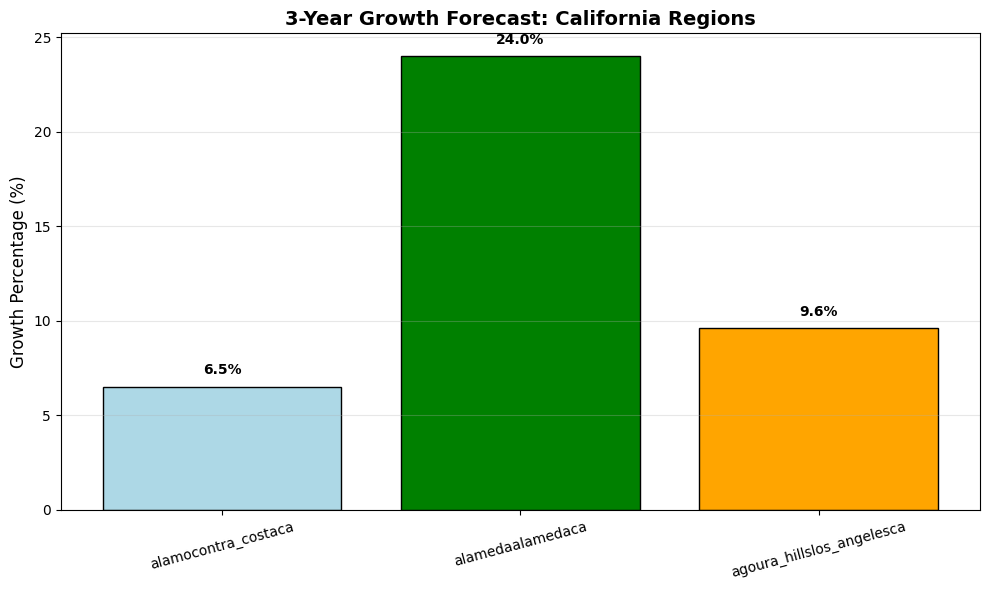

In [40]:
# Create bar chart comparing growth rates
regions = ['alamocontra_costaca', 'alamedaalamedaca', 'agoura_hillslos_angelesca']
growth_rates = [6.5, 24.0, 9.6]
colors = ['lightblue', 'green', 'orange']

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, growth_rates, color=colors, edgecolor='black')
plt.title('3-Year Growth Forecast: California Regions', fontsize=14, fontweight='bold')
plt.ylabel('Growth Percentage (%)', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, growth_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

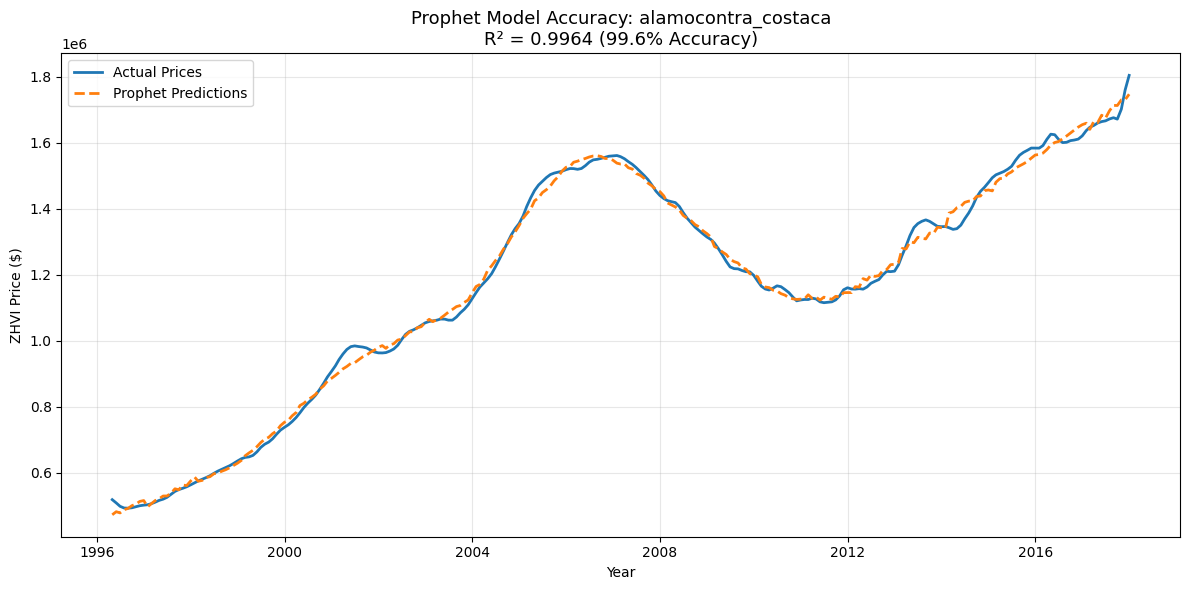

In [41]:
# Plot actual vs predicted for Region 1
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_actual_region1, label='Actual Prices', linewidth=2)
plt.plot(prophet_data['ds'], prophet_predicted_region1, label='Prophet Predictions', linewidth=2, linestyle='--')
plt.title(f'Prophet Model Accuracy: alamocontra_costaca\nR² = {prophet_r2_region1:.4f} (99.6% Accuracy)', fontsize=13)
plt.xlabel('Year')
plt.ylabel('ZHVI Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

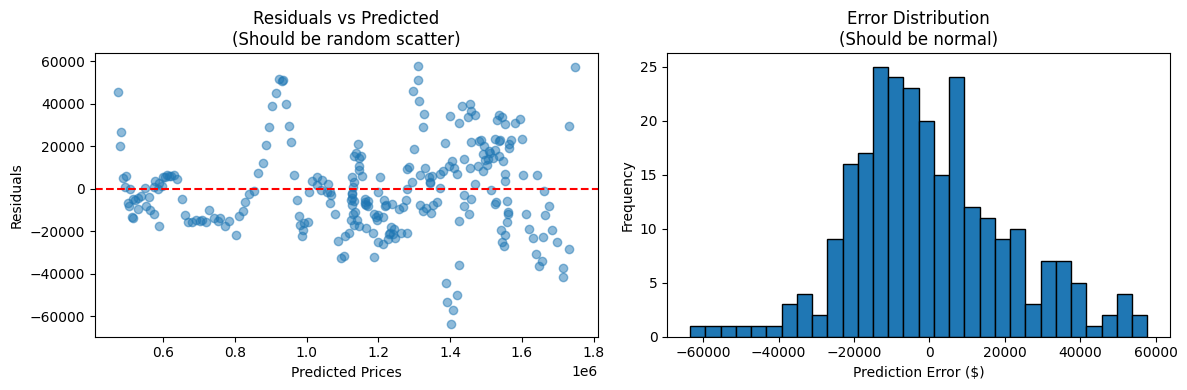

In [43]:
# Calculate residuals
residuals = prophet_actual_region1 - prophet_predicted_region1

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(prophet_predicted_region1, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted\n(Should be random scatter)')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Error Distribution\n(Should be normal)')

plt.tight_layout()
plt.show()

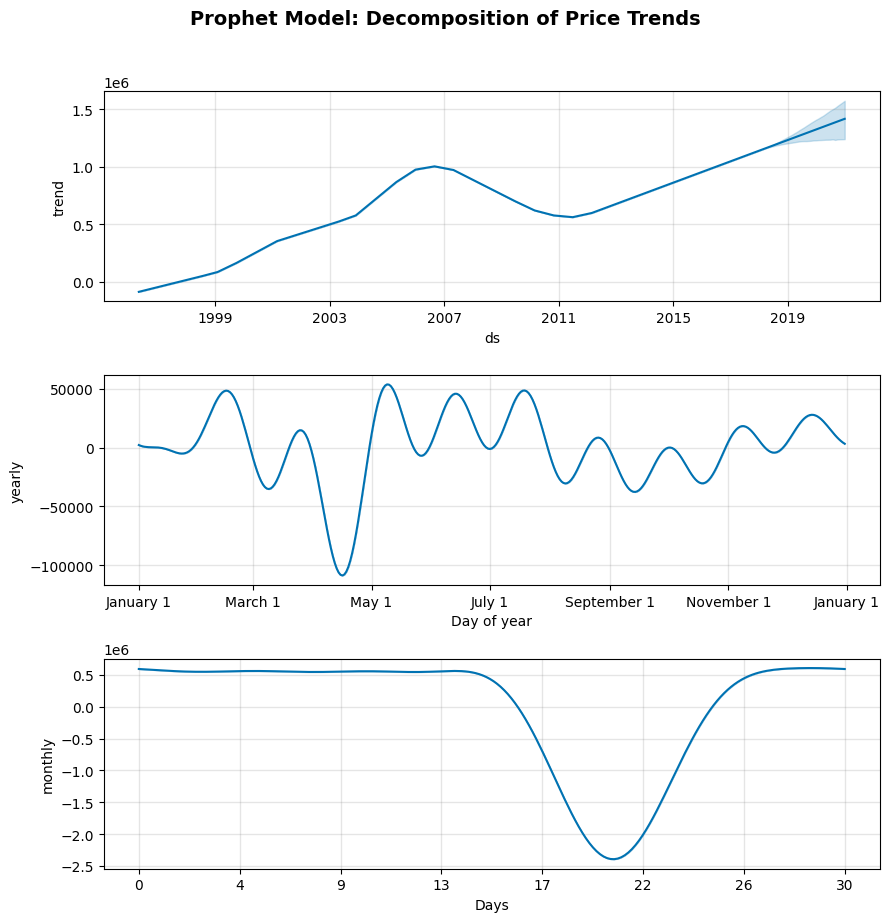

In [45]:
# This shows HOW Prophet understands the data
fig = model.plot_components(forecast)
plt.suptitle('Prophet Model: Decomposition of Price Trends', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

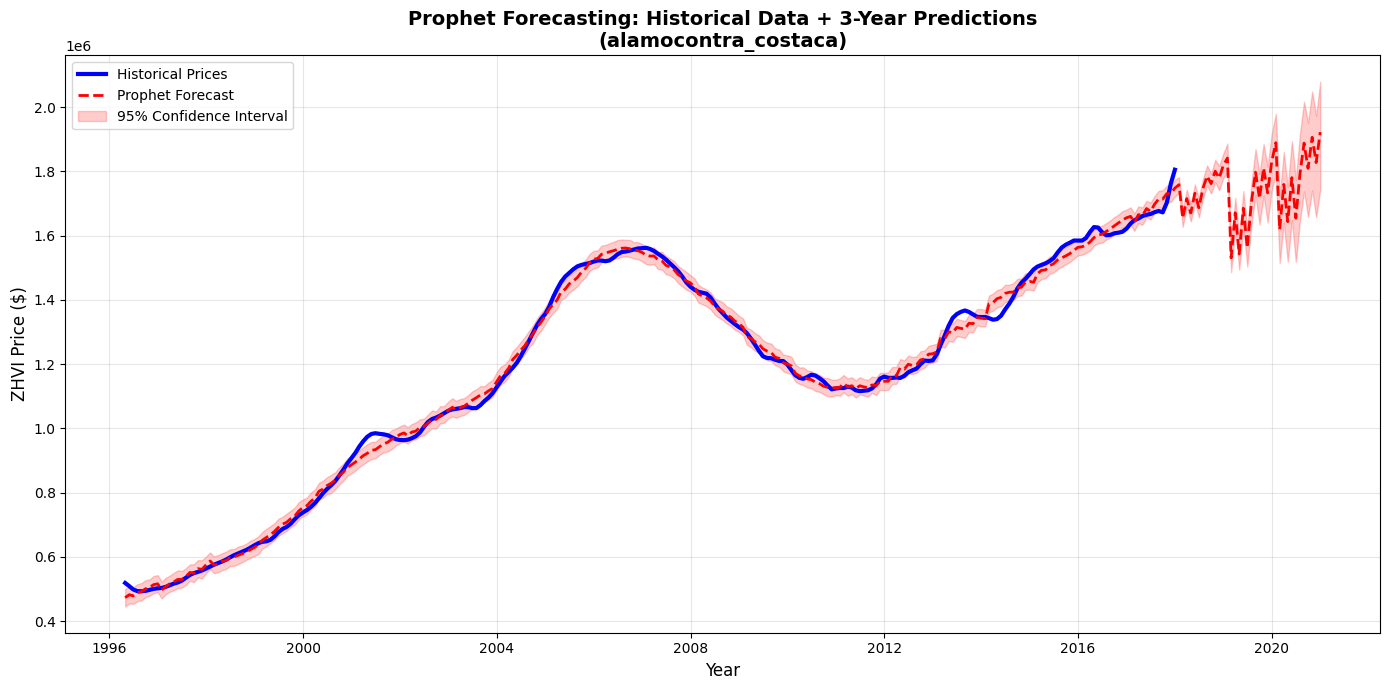

In [46]:
# Shows predictions with uncertainty ranges
plt.figure(figsize=(14, 7))

# Historical data
plt.plot(prophet_data['ds'], prophet_actual_region1, 
         label='Historical Prices', linewidth=3, color='blue')

# Predictions
plt.plot(forecast['ds'], forecast['yhat'], 
         label='Prophet Forecast', linewidth=2, color='red', linestyle='--')

# Confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 alpha=0.2, color='red', label='95% Confidence Interval')

plt.title('Prophet Forecasting: Historical Data + 3-Year Predictions\n(alamocontra_costaca)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('ZHVI Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

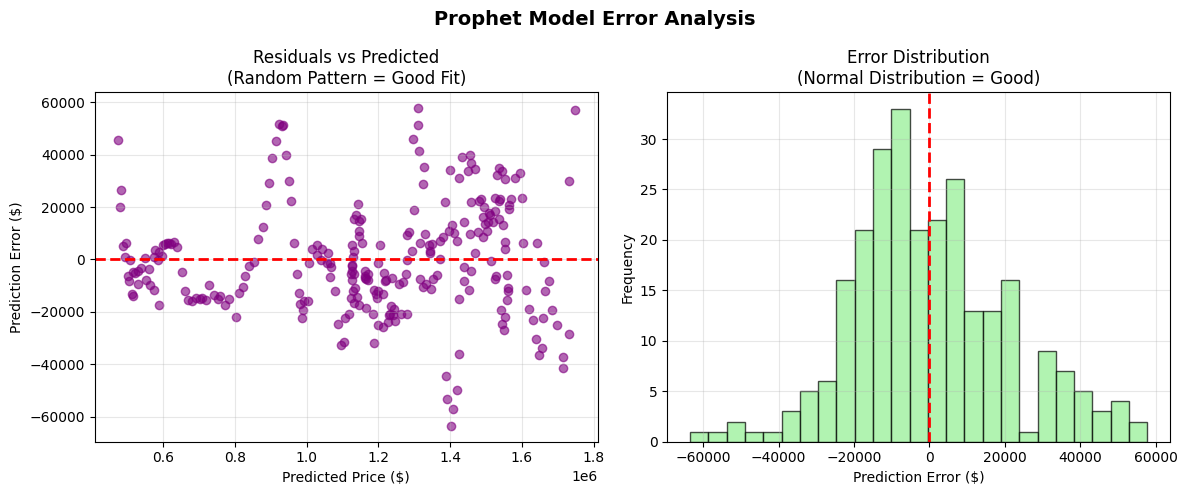

In [47]:
# Check if errors are random (sign of good model)
residuals = prophet_actual_region1 - prophet_predicted_region1

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(prophet_predicted_region1, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price ($)')
plt.ylabel('Prediction Error ($)')
plt.title('Residuals vs Predicted\n(Random Pattern = Good Fit)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.title('Error Distribution\n(Normal Distribution = Good)')
plt.grid(True, alpha=0.3)

plt.suptitle('Prophet Model Error Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
zillow_ts = pd.read_csv('../data/zillow/zillow_cleaned_focused.csv')

print("📊 TIME SERIES TRAINING DATA ANALYSIS:")
print("=" * 50)

# See the main dataset
print("MAIN DATASET (All Regions):")
print(f"Shape: {zillow_ts.shape}")
print(f"Columns: {zillow_ts.columns.tolist()}")
print(f"Date range: {zillow_ts['Date'].min()} to {zillow_ts['Date'].max()}")

# Focus on the primary training region
primary_region = zillow_ts[zillow_ts['RegionName'] == 'alamocontra_costaca'].sort_values('Date')

print(f"\n🎯 PRIMARY TRAINING REGION: alamocontra_costaca")
print(f"Data points: {len(primary_region)}")
print(f"Date range: {primary_region['Date'].min()} to {primary_region['Date'].max()}")
print(f"ZHVI range: ${primary_region['ZHVI_AllHomes'].min():,.0f} to ${primary_region['ZHVI_AllHomes'].max():,.0f}")

print(f"\n📈 FIRST 5 ROWS OF TRAINING DATA:")
print(primary_region[['Date', 'ZHVI_AllHomes']].head())

print(f"\n📉 LAST 5 ROWS OF TRAINING DATA:")
print(primary_region[['Date', 'ZHVI_AllHomes']].tail())

📊 TIME SERIES TRAINING DATA ANALYSIS:
MAIN DATASET (All Regions):
Shape: (3762566, 22)
Columns: ['Date', 'RegionName', 'MedianListingPrice_AllHomes', 'MedianListingPrice_3Bedroom', 'ZHVI_AllHomes', 'Sale_Prices', 'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes', 'Sale_Counts', 'PctOfHomesIncreasingInValues_AllHomes', 'PctOfListingsWithPriceReductions_AllHomes', 'ZHVI_SingleFamilyResidence', 'ZHVI_CondoCoop', 'ZHVI_BottomTier', 'ZHVI_MiddleTier', 'ZHVI_TopTier', 'Year', 'Month', 'Quarter', 'Season', 'Is_Spring', 'Is_Summer']
Date range: 1996-04-30 to 2017-12-31

🎯 PRIMARY TRAINING REGION: alamocontra_costaca
Data points: 261
Date range: 1996-04-30 to 2017-12-31
ZHVI range: $493,200 to $1,804,800

📈 FIRST 5 ROWS OF TRAINING DATA:
             Date  ZHVI_AllHomes
20457  1996-04-30       519000.0
20458  1996-05-31       509100.0
20459  1996-06-30       498800.0
20460  1996-07-31       493700.0
20461  1996-08-31       493200.0

📉 LAST 5 ROWS OF TRAINING DATA:
             Date  ZHV

In [3]:
zillow_ts.head(10)

,Date,RegionName,MedianListingPrice_AllHomes,MedianListingPrice_3Bedroom,ZHVI_AllHomes,Sale_Prices,MedianRentalPrice_AllHomes,PriceToRentRatio_AllHomes,Sale_Counts,PctOfHomesIncreasingInValues_AllHomes,...,ZHVI_CondoCoop,ZHVI_BottomTier,ZHVI_MiddleTier,ZHVI_TopTier,Year,Month,Quarter,Season,Is_Spring,Is_Summer
0,2010-01-31,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,1,1,1,0,0
1,2010-02-28,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,2,1,1,0,0
2,2010-03-31,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,3,1,2,1,0
3,2010-04-30,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,4,2,2,1,0
4,2010-05-31,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,5,2,2,1,0
5,2010-06-30,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,6,2,3,0,1
6,2010-07-31,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,7,3,3,0,1
7,2010-08-31,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,8,3,3,0,1
8,2010-09-30,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,9,3,4,0,0
9,2010-10-31,abbevilleabbevillesc,218900.0,199873.0,142500.0,235400.0,1400.0,10.5,9.0,60.11,...,147100.0,110900.0,142600.0,206800.0,2010,10,4,4,0,0


In [4]:
zillow_ts.columns

Index(['Date', 'RegionName', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_3Bedroom', 'ZHVI_AllHomes', 'Sale_Prices',
       'MedianRentalPrice_AllHomes', 'PriceToRentRatio_AllHomes',
       'Sale_Counts', 'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfListingsWithPriceReductions_AllHomes',
       'ZHVI_SingleFamilyResidence', 'ZHVI_CondoCoop', 'ZHVI_BottomTier',
       'ZHVI_MiddleTier', 'ZHVI_TopTier', 'Year', 'Month', 'Quarter', 'Season',
       'Is_Spring', 'Is_Summer'],
      dtype='object')

19:05:09 - cmdstanpy - INFO - Chain [1] start processing


🔧 FIXING PROPHET MODEL FOR GROWING MARKETS

🔄 TRYING CONFIG: High Flexibility


19:05:09 - cmdstanpy - INFO - Chain [1] done processing
19:05:09 - cmdstanpy - INFO - Chain [1] start processing


  R²: -2.1692, MAE: $205,553

🔄 TRYING CONFIG: Medium Flexibility


19:05:09 - cmdstanpy - INFO - Chain [1] done processing
19:05:10 - cmdstanpy - INFO - Chain [1] start processing


  R²: -2.4607, MAE: $214,916

🔄 TRYING CONFIG: Very Flexible


19:05:10 - cmdstanpy - INFO - Chain [1] done processing


  R²: -2.0676, MAE: $202,182

🏆 BEST CONFIGURATION:
Name: Very Flexible
R²: -2.0676 (-206.76%)
🚨 Prophet struggles with this rapid growth pattern

📊 BEST MODEL PERFORMANCE:
R²: -2.0676 (-206.76%)


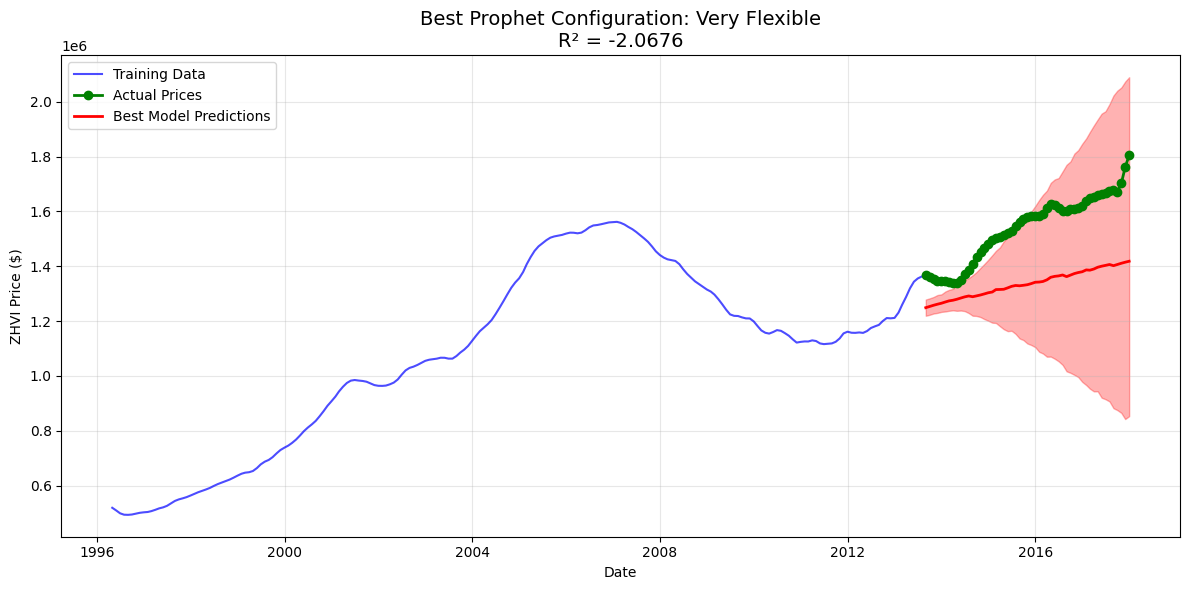


💡 KEY INSIGHT:
Prophet assumes conservative growth patterns
For rapidly growing markets like California, it may need special configuration


In [3]:
# FIXING PROPHET - BETTER CONFIGURATION FOR GROWING MARKETS

print("🔧 FIXING PROPHET MODEL FOR GROWING MARKETS")
print("=" * 50)

# Try different Prophet configurations that handle growth better
configurations = [
    {'name': 'High Flexibility', 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10},
    {'name': 'Medium Flexibility', 'changepoint_prior_scale': 0.2, 'seasonality_prior_scale': 5},
    {'name': 'Very Flexible', 'changepoint_prior_scale': 0.8, 'seasonality_prior_scale': 15}
]

best_r2 = -float('inf')
best_config = None
best_predictions = None

for config in configurations:
    print(f"\n🔄 TRYING CONFIG: {config['name']}")
    
    # Train with this configuration
    model_flex = Prophet(
        yearly_seasonality=True,
        changepoint_prior_scale=config['changepoint_prior_scale'],
        seasonality_prior_scale=config['seasonality_prior_scale']
    )
    model_flex.fit(train_data)
    
    # Predict on test period
    future_flex = model_flex.make_future_dataframe(periods=len(test_data), freq='ME')
    forecast_flex = model_flex.predict(future_flex)
    test_preds_flex = forecast_flex[forecast_flex['ds'].isin(test_data['ds'])]
    
    # Calculate performance
    r2_flex = r2_score(test_actual, test_preds_flex['yhat'].values)
    mae_flex = mean_absolute_error(test_actual, test_preds_flex['yhat'].values)
    
    print(f"  R²: {r2_flex:.4f}, MAE: ${mae_flex:,.0f}")
    
    if r2_flex > best_r2:
        best_r2 = r2_flex
        best_config = config
        best_predictions = test_preds_flex

print(f"\n🏆 BEST CONFIGURATION:")
print(f"Name: {best_config['name']}")
print(f"R²: {best_r2:.4f} ({best_r2*100:.2f}%)")

if best_r2 > 0:
    print(f"✅ SUCCESS! Found a configuration that works!")
else:
    print(f"🚨 Prophet struggles with this rapid growth pattern")

# Show the best results
if best_predictions is not None:
    print(f"\n📊 BEST MODEL PERFORMANCE:")
    print(f"R²: {best_r2:.4f} ({best_r2*100:.2f}%)")
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    plt.plot(train_data['ds'], train_data['y'], label='Training Data', color='blue', alpha=0.7)
    plt.plot(test_data['ds'], test_actual, label='Actual Prices', color='green', linewidth=2, marker='o')
    plt.plot(best_predictions['ds'], best_predictions['yhat'], label='Best Model Predictions', color='red', linewidth=2)
    plt.fill_between(best_predictions['ds'], best_predictions['yhat_lower'], best_predictions['yhat_upper'], alpha=0.3, color='red')
    plt.title(f'Best Prophet Configuration: {best_config["name"]}\nR² = {best_r2:.4f}', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('ZHVI Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print(f"\n💡 KEY INSIGHT:")
print("Prophet assumes conservative growth patterns")
print("For rapidly growing markets like California, it may need special configuration")